In [1]:
import sys

# Базовые структуры данных

## 2.1 Скобки в коде

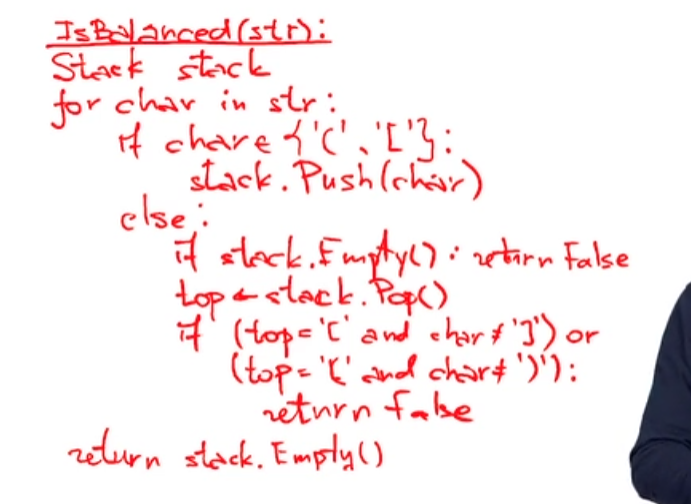

In [4]:
def check_brackets(string):
    
    brackets = {
        '(': ')',
        '{': '}',
        '[': ']'
    }
    
    stack = []
    pos_stack = []
    i = 1
    
    for elem in string:
        if elem in brackets.keys() or elem in brackets.values():
            if elem in brackets.keys():
                stack.append(elem)
                pos_stack.append(i)
            else:
                if not bool(stack):
                    return i
                top = stack.pop()
                pos_stack.pop()
                if brackets[top] != elem:
                    return i
        i += 1
    
    if bool(stack):
        return pos_stack[-1]
    else:
        return "Success"

## 2.2 Высота дерева

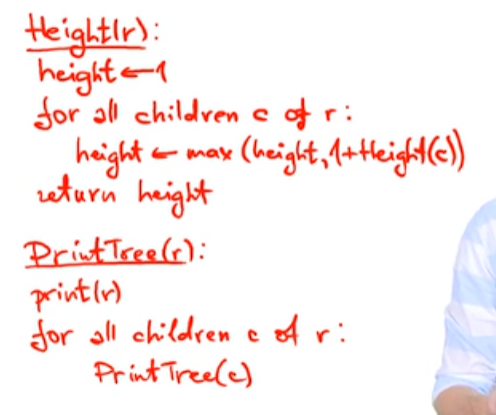

In [25]:
import sys
sys.setrecursionlimit(50000)
# put your python code here
n = int(input())
tree = list(map(int, input().split()[:n]))

children_dict = dict()
for i in range(n):
    children_dict.get(tree[i], [i]).append(i)
    children_dict[tree[i]] = children_dict.get(tree[i], [i])

def Height(children_dict, root):
    height = 1
    for children in children_dict[root]:
        if children in children_dict.keys():
            height = max(height, 1 + Height(children_dict, children))
    
    return height

print(Height(children_dict, -1))

10
9 7 5 5 2 9 9 9 2 -1
4


## 2.3 Обработка сетевых пактов

In [13]:
size, n = map(int, input().split())
buff = []  # список времен окончания задач
time = 0  # время после прохождения всех задач в буфере
out = []

for _ in range(n):
    inp = tuple(map(int, input().split()))

    if len(buff) >= size:
        if inp[0] < buff[0]:
            out.append(-1)
            continue
        else:
            del buff[0]

    if len(buff) < size:
        time = max(time, inp[0])
        out.append(time)
        time += inp[1]
        buff.append(time)

print(*out, sep='\n')

2 5
2 9
4 8
10 9
15 2
 19 1
2
11
-1
19
21


## 2.4 Стек с поддержкой масимума

In [14]:
class StackMAX:
    
    def __init__(self):
        self.size = 0
        self.arr = []
        self.max_arr = []
        
    def push(self, elem):
        if self.size == 0:
            self.arr.append(elem)
            self.size += 1
            self.max_arr.append(elem)
        else:
            self.arr.append(elem)
            self.size += 1
            self.max_arr.append(max(self.max_arr[-1], elem))
    
    def pop(self):
        if self.size != 0:
            self.size -= 1
            self.max_arr.pop()
            return self.arr.pop()
    
    def get_max(self):
        if self.size != 0:
            return self.max_arr[-1]

q = int(input())
buffer = []
max_stack = StackMAX()
for _ in range(q):
    query = input()
    if 'push' in query:
        max_stack.push(int(list(query.split())[1]))
    elif 'pop' in query:
        max_stack.pop()
    elif 'max' in query:
        buffer.append(max_stack.get_max())
        
print(*buffer, sep='\n')

## 2.5 Максимум в скользящем окне

In [11]:
class Stack:
    
    def __init__(self):
        self.size = 0
        self.arr = []
        self.max_arr = [0]
        
    def push(self, elem):
        self.arr.append(elem)
        self.size += 1
        self.max_arr.append(max(self.max_arr[-1], elem))
    
    def pop(self):
        if self.size != 0:
            self.size -= 1
            self.max_arr.pop()
            return self.arr.pop()
    
    def get_max(self):
        return self.max_arr[-1]

In [20]:
n = int(input())
array = list(map(int, input().split()))
m = int(input())

first_stack = Stack()
second_stack = Stack()

for i in range(m):
    first_stack.push(array[i])

for _ in range(m):
    second_stack.push(first_stack.pop())
    
for i in range(n - m + 1):
    if first_stack.size == m:
        while first_stack.size != 0:
            second_stack.push(first_stack.pop())
    
    print(max(first_stack.get_max(), second_stack.get_max()))
    second_stack.pop()
    if i + m < n:
        first_stack.push(array[i + m])

15
28 7 64 40 68 86 80 93 4 53 32 56 68 18 59
12


# Очереди с приоритетом и системы непересекающихся множеств

In [33]:
class HeapMIN:
    
    def __init__(self):
        self.arr = []
        self.size = 0
    
    def Parent(self, i):
        return int((i - 1) / 2)
    
    def LeftChild(self, i):
        return 2 * i + 1
    
    def RightChild(self, i):
        return 2 * i + 2
    
    def SiftUp(self, i):
        while i > 0 and self.arr[self.Parent(i)] > self.arr[i]:
            self.arr[self.Parent(i)], self.arr[i] = self.arr[i], self.arr[self.Parent(i)]
            i = self.Parent(i)
    
    def SiftDown(self, i):
        minIndex = i
        l = self.LeftChild(i)
        if l < self.size and self.arr[l] < self.arr[minIndex]:
            minIndex = l
        r = self.RightChild(i)
        if r < self.size and self.arr[r] < self.arr[minIndex]:
            minIndex = r
        if i != minIndex:
            self.arr[i], self.arr[minIndex] = self.arr[minIndex], self.arr[i]
            self.SiftDown(minIndex)
    
    def insert(self, p):
        self.size += 1
        self.arr.append(p)
        self.SiftUp(self.size - 1)
        
    def extractMax(self):
        if self.size != 0:
            res = self.arr[0]
            self.arr[0] = self.arr.pop()
            self.size -= 1
            self.SiftDown(0)
            return res
    
    def remove(self, i):
        if self.size != 0:
            self.arr[i] = self.arr[0] + 1
            self.SiftUp(i)
            self.extractMax()
    
    def changePriority(self, i, p):
        if self.size != 0:
            old_p = self.arr[i]
            self.arr[i] = p
            if p < old_p:
                self.SiftUp(i)
            else:
                self.SiftDown(i)

## 3.1 Построение кучи

In [34]:
class Heap:
    
    def __init__(self):
        self.arr = []
        self.size = 0
        self.permutations = []
        self.num_permutations = 0
     
    def SiftDown(self, i):
        minIndex = i
        l = 2 * i + 1
        if l < self.size and self.arr[l] < self.arr[minIndex]:
            minIndex = l
        r = 2 * i + 2
        if r < self.size and self.arr[r] < self.arr[minIndex]:
            minIndex = r
        if i != minIndex:
            self.num_permutations += 1
            self.permutations.append((i, minIndex))
            self.arr[i], self.arr[minIndex] = self.arr[minIndex], self.arr[i]
            self.SiftDown(minIndex)
    
    def __call__(self, array, size):
        self.arr = array
        self.size = size
        for i in range(self.size // 2 - 1, -1, -1):
            self.SiftDown(i)

n = int(input())
array = list(map(int, input().split()))

heap = Heap()
heap(array, n)

print(heap.num_permutations)
for permutation in heap.permutations:
    print(*permutation)

9
9 8 7 6 5 4 3 2 1
7
3 8
2 6
1 3
3 7
0 1
1 3
3 8


## 3.2 Параллельная обработка

In [74]:
n, m = map(int, input().split())
arr = list(map(int, input().split()))

processors = []
for i in range(n):
    processors.append([0, i])
    
def SiftDown(i, arr, n):
    minIndex, l, r = i, 2 * i + 1, 2 * i + 2
    if l < n and arr[l][0] <= arr[minIndex][0]:
        # условие 1, что доступный процессор один.
        if arr[l][0] < arr[minIndex][0]:
            minIndex = l
        # если же условие 1 не выполняется, это значит, что доступных процессоров несколько, поэтому проверяем номера этих процессоров 
        if arr[l][0] == arr[minIndex][0] and arr[l][1] < arr[minIndex][1]:
            minIndex = l
    if r < n and arr[r][0] <= arr[minIndex][0]:
        # условие 1, что доступный процессор один.
        if arr[r][0] < arr[minIndex][0]:
            minIndex = r
        # если же условие 1 не выполняется, это значит, что доступных процессоров несколько, поэтому проверяем номера этих процессоров     
        if arr[r][0] == arr[minIndex][0] and arr[r][1] < arr[minIndex][1]:
            minIndex = r
    if i != minIndex:
        arr[i], arr[minIndex] = arr[minIndex], arr[i]
        SiftDown(minIndex, arr, n)
        
for elem in arr:
    print(processors[0][1], processors[0][0])
    processors[0][0] += elem
    SiftDown(0, processors, n)

2
5
1 2 3 4 5
0 0
1 0
0 1
1 2
0 4


## 4.1 Объединение таблиц

In [ ]:
class Intersections():
    def __init__(self, tables_count, tables_lengths):
        self.parent = [i for i in range(tables_count)]
        self.tables_lengths = tables_lengths
        self.max_len = max(self.tables_lengths)

    def find(self, idx):
        if self.parent[idx] != idx:
            self.parent[idx] = self.find(self.parent[idx])
        return self.parent[idx]

    def union(self, destination, source):
        destination_parent = self.find(destination)
        source_parent = self.find(source)
        if source_parent != destination_parent:
            self.tables_lengths[destination_parent] += self.tables_lengths[source_parent]
            self.tables_lengths[source_parent] = 0
            if self.tables_lengths[destination_parent] > self.max_len:
                self.max_len = self.tables_lengths[destination_parent]
            self.parent[source_parent] = destination_parent
        return self.max_len

n, m = list(map(int, input().split()))    
rank = list(map(int, input().split()))    
intersections = Intersections(n, rank)    
for _ in range(m):
    destination, source = list(map(lambda elem: int(elem) - 1, input().split()))
    print(intersections.union(destination, source))

## 4.2 Автоматический анализ программ

In [ ]:
class Intersections():
    def __init__(self, n):
        self.parent = [i for i in range(n)]

    def find(self, i):
        while i != self.parent[i]:
            i = self.parent[i]
        return i

    def union(self, i, j):
        i_id = self.find(i)
        self.parent[j] = i_id

n, e, d = map(int, input().split())
main = Intersections(n)

for _ in range(e):
    i, j = map(int, input().split())
    main.union(i - 1, j - 1)

cool = 1
for _ in range(d):
    i, j = map(int, input().split())
    if main.find(i - 1) == main.find(j - 1):
        cool = 0
print(cool)

# Хэш-таблицы

## 5.1 Телефонная книга

In [4]:
phone_dict = dict()
n = int(input())
for _ in range(n):
    query = list(input().split())
    if "add" == query[0]:
        phone_dict[int(query[1])] = query[2]
    elif "del" == query[0]:
        if int(query[1]) in phone_dict:
            del phone_dict[int(query[1])]
    elif "find" == query[0]:
        if int(query[1]) in phone_dict:
            print(phone_dict[int(query[1])])
        else:
            print("not found")

add 911 police
add 76213 Mom
add 17239 Bob
find 76213
Mom
find 910
not found
find 911
police
del 910
del 911
find 911
not found
find 76213
Mom
add 76213 daddy
find 76213
daddy


## 5.2 Хеширование цепочками

In [29]:
def hash_function(string, m):
    p = 1000000007
    x = 263
    result = 0
    for i in range(len(string)):
        result += ord(string[i]) * x ** i
    return result % p % m

In [67]:
m = int(input())
n = int(input())
hash_chain = [[] for _ in range(m)]

for _ in range(n):
    request = list(input().split())
    
    if "add" == request[0]:
        current_hash_function_res = hash_function(request[1], m)
        if request[1] not in hash_chain[current_hash_function_res]:
            hash_chain[current_hash_function_res].append(request[1])
    
    elif "del" == request[0]:
        current_hash_function_res = hash_function(request[1], m)
        if request[1] in hash_chain[current_hash_function_res]:
            index = hash_chain[current_hash_function_res].index(request[1])
            del hash_chain[current_hash_function_res][index]
    
    elif "find" == request[0]:
        current_hash_function_res = hash_function(request[1], m)
        if request[1] in hash_chain[current_hash_function_res]:
            print('yes')
        else:
            print('no')
        
    elif "check" == request[0]:   
        if bool(hash_chain[int(request[1])]):
            print(' '.join(list(reversed(hash_chain[int(request[1])]))))

5
12


## 5.3 Поиск образца в тексте

In [60]:
def hash_function(string):
    p = 1000000007
    x = 1
    result = 0
    for i in range(len(string)):
        result += ord(string[i]) * x ** i
    return result % p

pattern = input()
text = input()

pattern_hash = hash_function(pattern)
for i in range(len(text) - len(pattern) + 1):
    if i == 0:
        slice_text_hash = hash_function(text[:len(pattern)])
        if slice_text_hash == pattern_hash:
            if text[:len(pattern)] == pattern:
                print(i)
    else:
        slice_text_hash = slice_text_hash - hash_function(text[i - 1]) + hash_function(text[i + len(pattern) - 1])
        if slice_text_hash == pattern_hash:
            if text[i: i + len(pattern)] == pattern:
                print(i)